<a href="https://colab.research.google.com/github/Ravi1603/EDA_practice/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install streamlit prophet plotly

  Using cached streamlit-1.38.0-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached tenacity-8.5.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached watchdog-4.0.2-py3-none-manylinux2014_x86_64.whl.metadata (38 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
Using cached streamlit-1.38.0-py2.py3-none-any.whl (8.7 MB)
Using cached GitPython-3.1.43-py3-none-any.whl (207 kB)
Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)
Using cached tenacity-8.5.0-py3-none-any.whl (28 kB)
Using cached watchdog-4.0.2-py3-none-manylinux2014_x86_64.whl (82 kB)
Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
Using cached smmap-5.0.1-py3-none-any.whl (24 kB)
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfu

In [14]:
import streamlit as st
from datetime import date

import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go

2024-09-08 23:51:48.391 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 23:51:48.530 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-08 23:51:48.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 23:51:48.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 23:51:48.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 23:51:48.550 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 23:51:48.555 Session state does not function when running a script without `streamlit run`
2024-09-08 23:51:48.558 Thread 'MainThread': missing ScriptRunContext! 

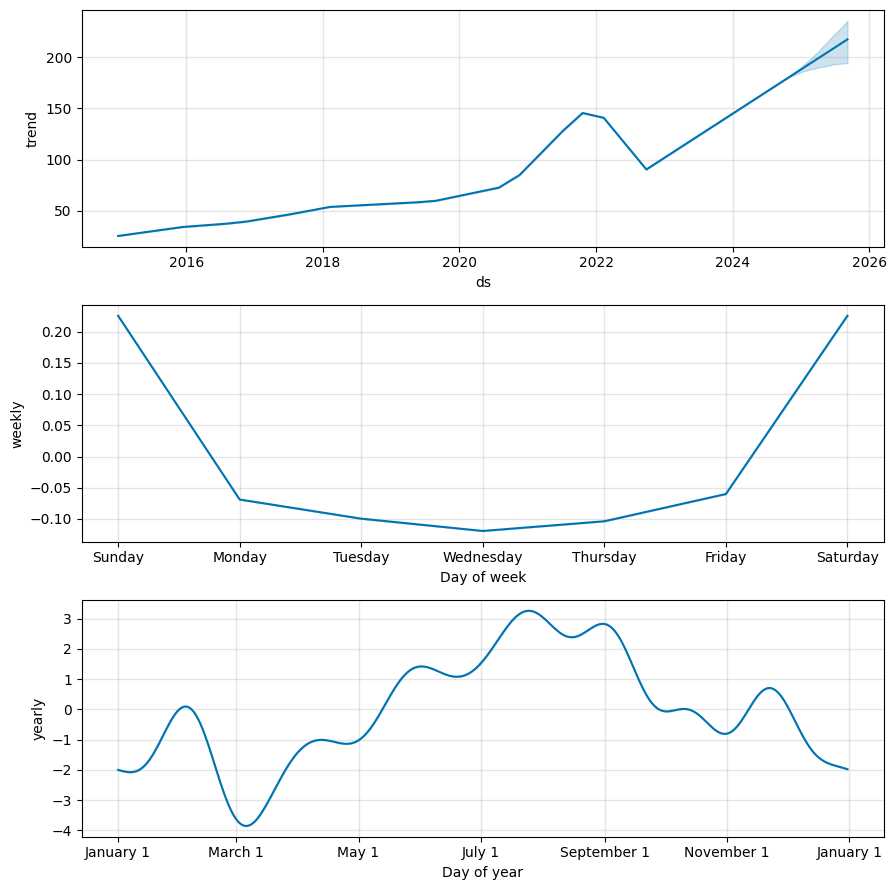

In [15]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

st.title('Stock Forecast App')

stocks = ('GOOG', 'AAPL', 'MSFT', 'GME')
selected_stock = st.selectbox('Select dataset for prediction', stocks)

n_years = st.slider('Years of prediction:', 1, 4)
period = n_years * 365


@st.cache
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data


data_load_state = st.text('Loading data...')
data = load_data(selected_stock)
data_load_state.text('Loading data... done!')

st.subheader('Raw data')
st.write(data.tail())

# Plot raw data
def plot_raw_data():
	fig = go.Figure()
	fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name="stock_open"))
	fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name="stock_close"))
	fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
	st.plotly_chart(fig)

plot_raw_data()

# Predict forecast with Prophet.
df_train = data[['Date','Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

# Show and plot forecast
st.subheader('Forecast data')
st.write(forecast.tail())

st.write(f'Forecast plot for {n_years} years')
fig1 = plot_plotly(m, forecast)
st.plotly_chart(fig1)

st.write("Forecast components")
fig2 = m.plot_components(forecast)
st.write(fig2)